In [2]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical # one-hot encoder for lists
from tensorflow.keras import models
from tensorflow.keras import layers

In [3]:
def vectorise_sequences(sequences, dimension=10000):
    rst = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        rst[i, sequence] = 1.
    return rst

def plot_epochs(x,
                y_A, style_A, label_A,
                y_B, style_B, label_B,
                title, x_label, y_label):
    import matplotlib.pyplot as plt
    plt.clf()
    plt.plot(x, y_A, style_A, label=label_A)
    plt.plot(x, y_B, style_B, label=label_B)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [4]:
# Load
(train_data, train_labels,), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [7]:
# preprocess
x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 36ms/step - loss: 2.6979 - accuracy: 0.4751 - val_loss: 1.8704 - val_accuracy: 0.6170
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5653 - accuracy: 0.6753 - val_loss: 1.4109 - val_accuracy: 0.6750
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1847 - accuracy: 0.7479 - val_loss: 1.1912 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.9539 - accuracy: 0.8006 - val_loss: 1.0681 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7818 - accuracy: 0.8334 - val_loss: 0.9956 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6556 - accuracy: 0.8604 - val_loss: 0.9409 - val_accuracy: 0.8010
Epoch 7/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5406 - accuracy: 0.8861 - val_loss: 0.9289 - val_accuracy: 0.7890
Epoch 8/20
16

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

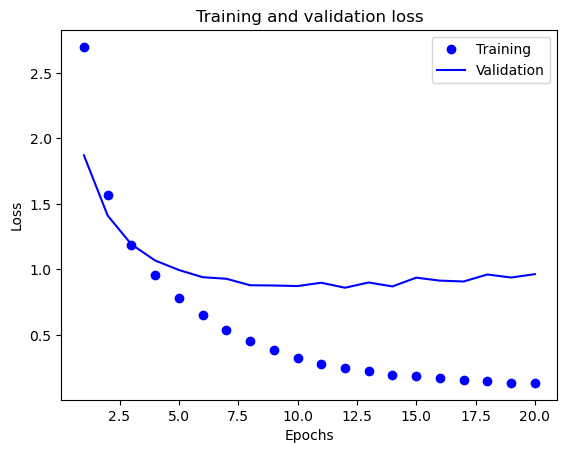

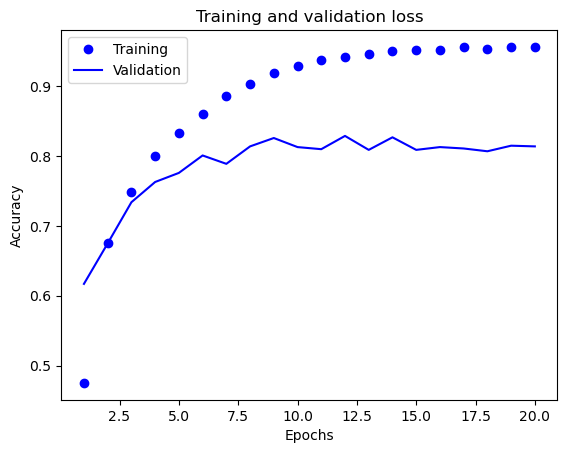

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plot_epochs(range(1, len(loss)+1), loss, 
            'bo', 'Training', val_loss, 'b', 'Validation',
            'Training and validation loss', 'Epochs', 'Loss')

plot_epochs(range(1, len(loss)+1), acc, 
            'bo', 'Training', val_acc, 'b', 'Validation',
            'Training and validation loss', 'Epochs', 'Accuracy')

In [17]:
print(f'{np.argmin(val_loss)} epochs')

11 epochs


In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, 
                    one_hot_train_labels,
                    epochs = np.argmin(val_loss),
                    batch_size = 512)

Epoch 1/11
18/18 [==============================] - 1s 14ms/step - loss: 2.9028 - accuracy: 0.4821
Epoch 2/11
18/18 [==============================] - 0s 15ms/step - loss: 1.6130 - accuracy: 0.6662
Epoch 3/11
18/18 [==============================] - 0s 14ms/step - loss: 1.2104 - accuracy: 0.7359
Epoch 4/11
18/18 [==============================] - 0s 13ms/step - loss: 0.9966 - accuracy: 0.7821
Epoch 5/11
18/18 [==============================] - 0s 12ms/step - loss: 0.8260 - accuracy: 0.8202
Epoch 6/11
18/18 [==============================] - 0s 13ms/step - loss: 0.6870 - accuracy: 0.8510
Epoch 7/11
18/18 [==============================] - 0s 13ms/step - loss: 0.5691 - accuracy: 0.8828
Epoch 8/11
18/18 [==============================] - 0s 13ms/step - loss: 0.4797 - accuracy: 0.9025
Epoch 9/11
18/18 [==============================] - 0s 13ms/step - loss: 0.4005 - accuracy: 0.9154
Epoch 10/11
18/18 [==============================] - 0s 13ms/step - loss: 0.3430 - accuracy: 0.9294
Epoch 11/

In [19]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 2ms/step - loss: 0.9054 - accuracy: 0.7996


[0.9054135680198669, 0.7996438145637512]